In [1]:
import sys
import os, glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [4]:
# Define project repo path
inDirName = '/Users/smurugan9/research/aislens/aislens_emulation/'

# DATA FILE PATHS

# Data containing regridded flux and SSH for 150 years
regriddedFluxSSH_filepath = 'data/interim/RegriddedFluxSSH.nc'

# File contains all defined ice shelves
iceShelvesShape_filepath = 'data/interim/iceShelves.geojson'

# Folder for output figures
figures_folderpath = 'reports/figures/' 

interim_data_folder = 'data/interim/'
rmse_results_folder = 'rmse_grid_220911/'
flux_dedrafted_data_path = 'dedrafted_flux_IMBIE/'
randomized_realizations_path = 'randomized_realizations/'
flux_dedrafted_iceshelves_data_path = 'iceshelves_dedrafted_flux/'
reconstructions_neofs_path = 'reconstructions_neofs/'
inFilesDir = inDirName+interim_data_folder+rmse_results_folder
inFilesResultsDir = inFilesDir+"results/"

In [5]:
rmse_grid = xr.open_dataset(inFilesResultsDir+"rmse_grid.nc")
rmse_grid = rmse_grid.__xarray_dataarray_variable__
rmse_grid = rmse_grid.drop('spatial_ref')

In [6]:
rmse_grid

<xarray.DataArray '__xarray_dataarray_variable__' (mode: 1500, y: 457, x: 552)>
[378396000 values with dtype=float64]
Coordinates:
    lat      (y, x) float64 ...
    lon      (y, x) float64 ...
  * x        (x) float64 -2.69e+06 -2.68e+06 -2.67e+06 ... 2.81e+06 2.82e+06
  * y        (y) float64 -2.32e+06 -2.31e+06 -2.3e+06 ... 2.23e+06 2.24e+06
  * mode     (mode) int64 0 1 2 3 4 5 6 7 ... 1493 1494 1495 1496 1497 1498 1499

In [7]:
%%time
eof_minrmse = rmse_grid.idxmin('mode')
minrmse = rmse_grid.min('mode')
rmse_grid_all = rmse_grid[1499]
avgrmse = rmse_grid.mean(['y','x'])

CPU times: user 5.03 s, sys: 7.82 s, total: 12.8 s
Wall time: 16.6 s


Text(0.5, 1.0, 'EOF Mode # for Minimum RMSE')

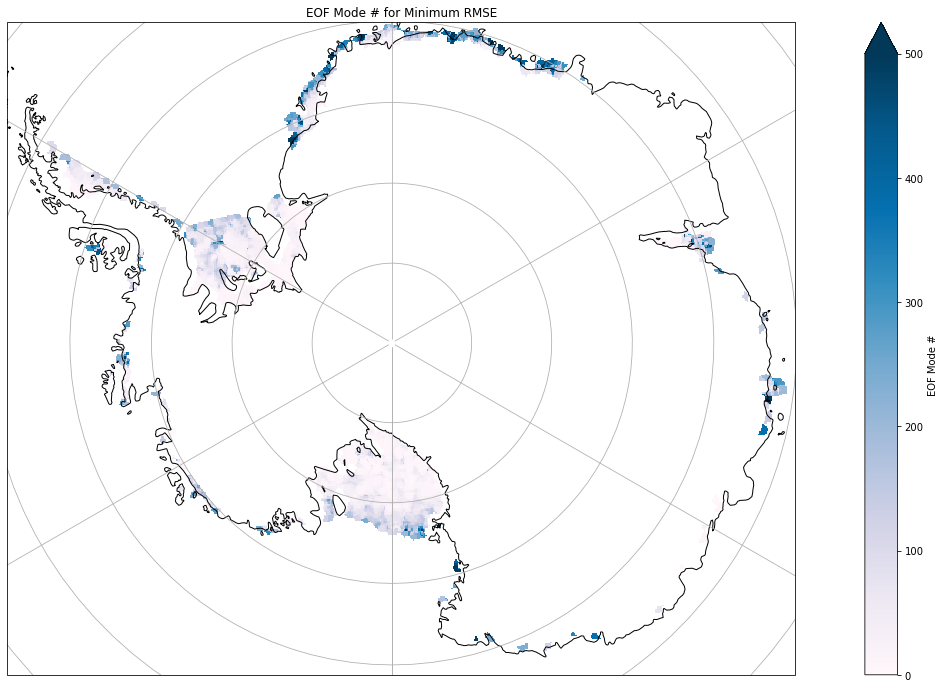

In [8]:
# EOF Mode # for Minimum RMSE

plt.figure(figsize=(25,12))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.gridlines()
eof_minrmse.plot(cmap="PuBu",
                 cbar_kwargs={"label":"EOF Mode #"},
                 vmax = 500, 
#                 vmin = 0,
                )
plt.title('EOF Mode # for Minimum RMSE')

Text(0.5, 1.0, 'Minimum RMSE across AIS')

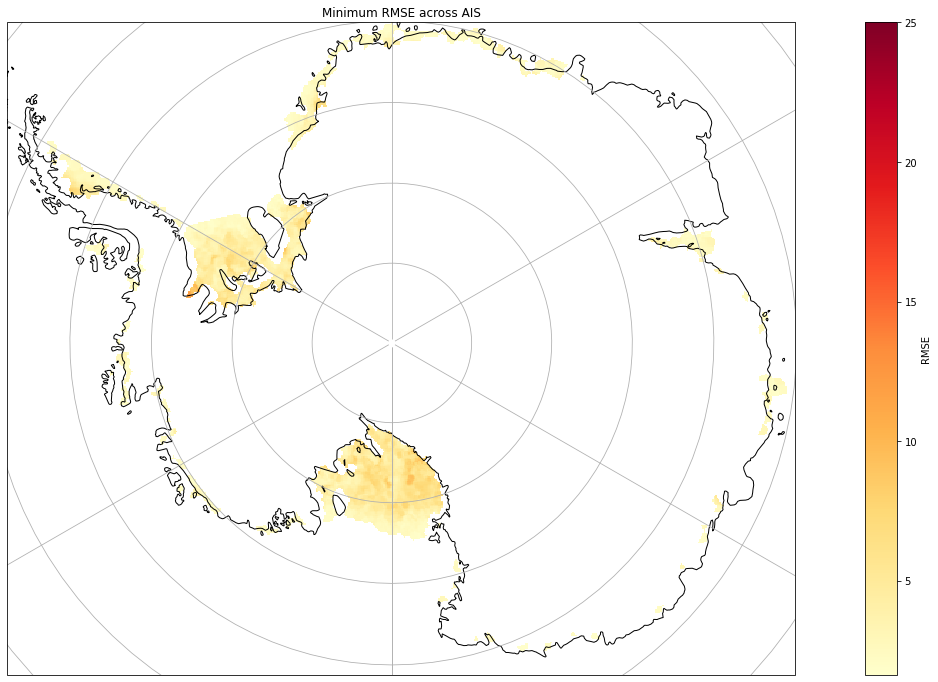

In [9]:
# Minimum RMSE across AIS

plt.figure(figsize=(25,12))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.gridlines()
minrmse.plot(cmap="YlOrRd",
             cbar_kwargs={"label":"RMSE"},
             vmax = 25, 
#             vmin = 0,
            )
plt.title('Minimum RMSE across AIS')

Text(0.5, 1.0, 'RMSE across AIS for reconstructed dataset with all EOFs')

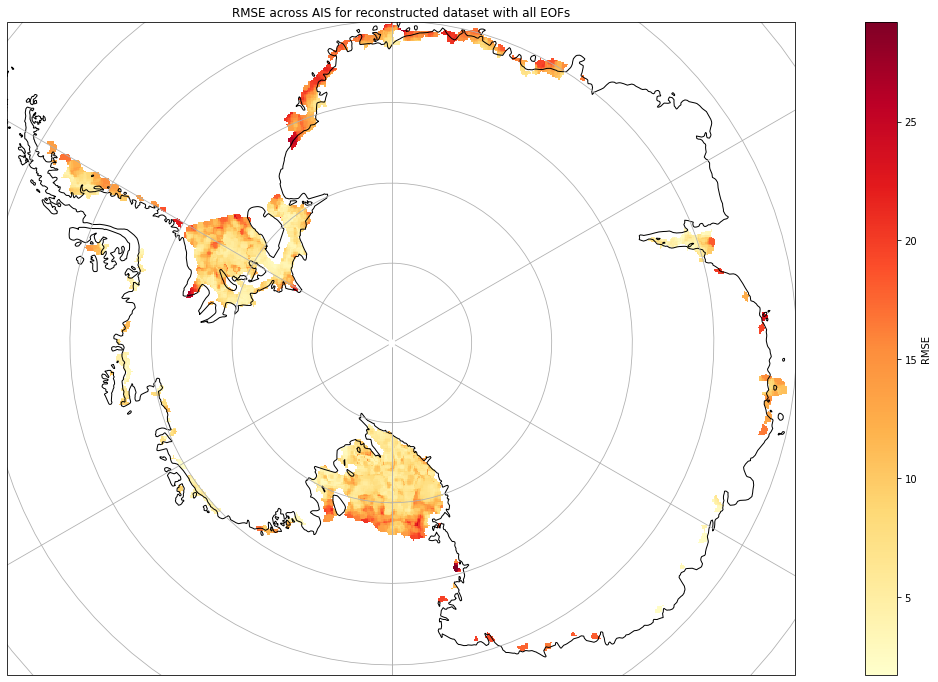

In [18]:
# RMSE across AIS for reconstructed dataset with all EOFs

plt.figure(figsize=(25,12))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.gridlines()
rmse_grid[10].plot(cmap="YlOrRd",
                   cbar_kwargs={"label":"RMSE"},
#                   vmax = 25, 
#                   vmin = 0,
                  )
plt.title('RMSE across AIS for reconstructed dataset with all EOFs')

Text(0.5, 1.0, 'Average RMSE across the ice sheet, Min RMSE occurs at 61.0 modes retained')

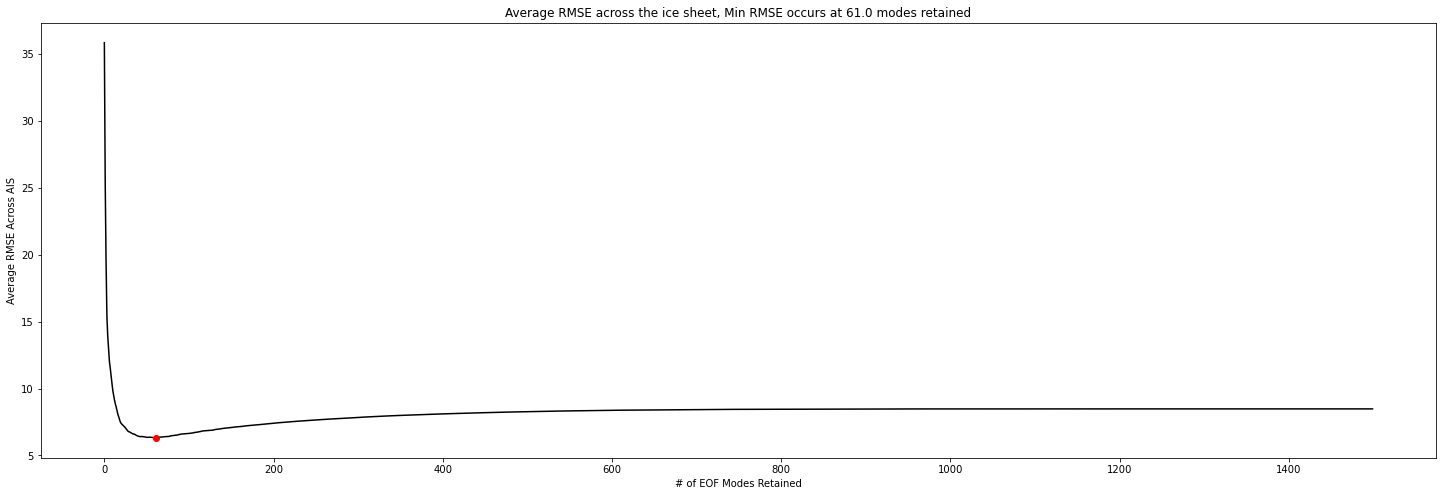

In [11]:
# Average RMSE as a function of modes retained
plt.figure(figsize=(25,8))
plt.plot(avgrmse,color='black')
plt.plot(avgrmse.idxmin('mode'),avgrmse.min('mode'),"o", color='r')
plt.title('Average RMSE (across spatial domain) as a function of modes retained')
plt.xlabel('# of EOF Modes Retained')
plt.ylabel('Average RMSE Across AIS')
plt.title('Average RMSE across the ice sheet, Min RMSE occurs at {} modes retained'.format(avgrmse.idxmin('mode').values))

In [12]:
rmse_grid_min = rmse_grid[np.argmin(avgrmse.to_numpy())]

Text(0.5, 1.0, 'RMSE across AIS for reconstructed dataset with 61 EOF modes for minimum avg RMSE calculated')

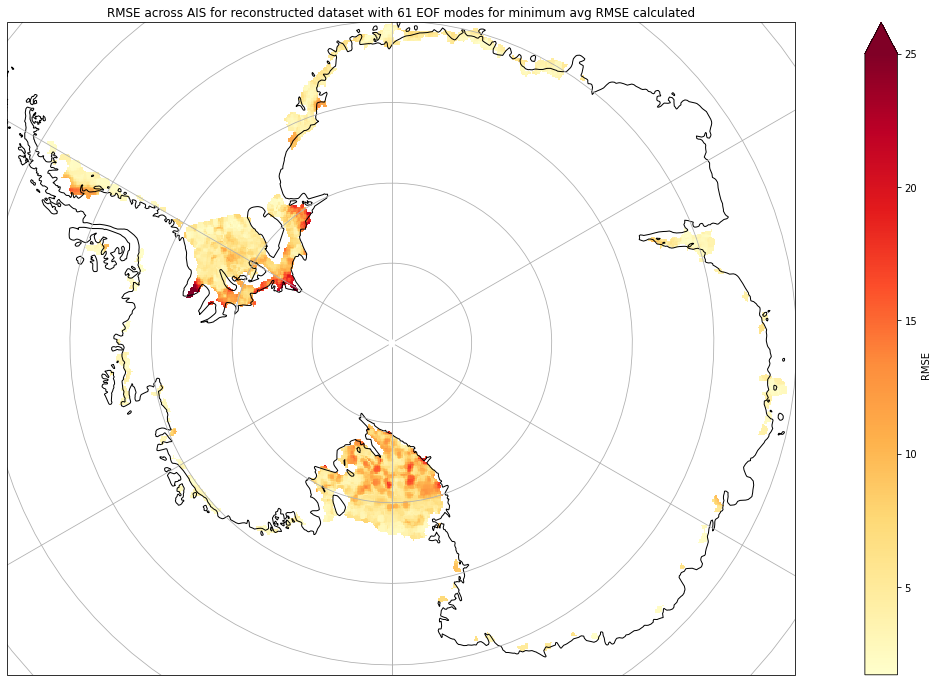

In [13]:
# RMSE across AIS for reconstructed dataset with () EOF modes for minimum avg RMSE calculated

plt.figure(figsize=(25,12))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.gridlines()
rmse_grid_min.plot(cmap="YlOrRd",
                   cbar_kwargs={"label":"RMSE"},
                   vmax = 25, 
#                   vmin = 0,
                  )
plt.title('RMSE across AIS for reconstructed dataset with {} EOF modes for minimum avg RMSE calculated'.format(rmse_grid_min.mode.values))

Text(0.5, 1.0, 'Distribution of Min RMSE EOF #')

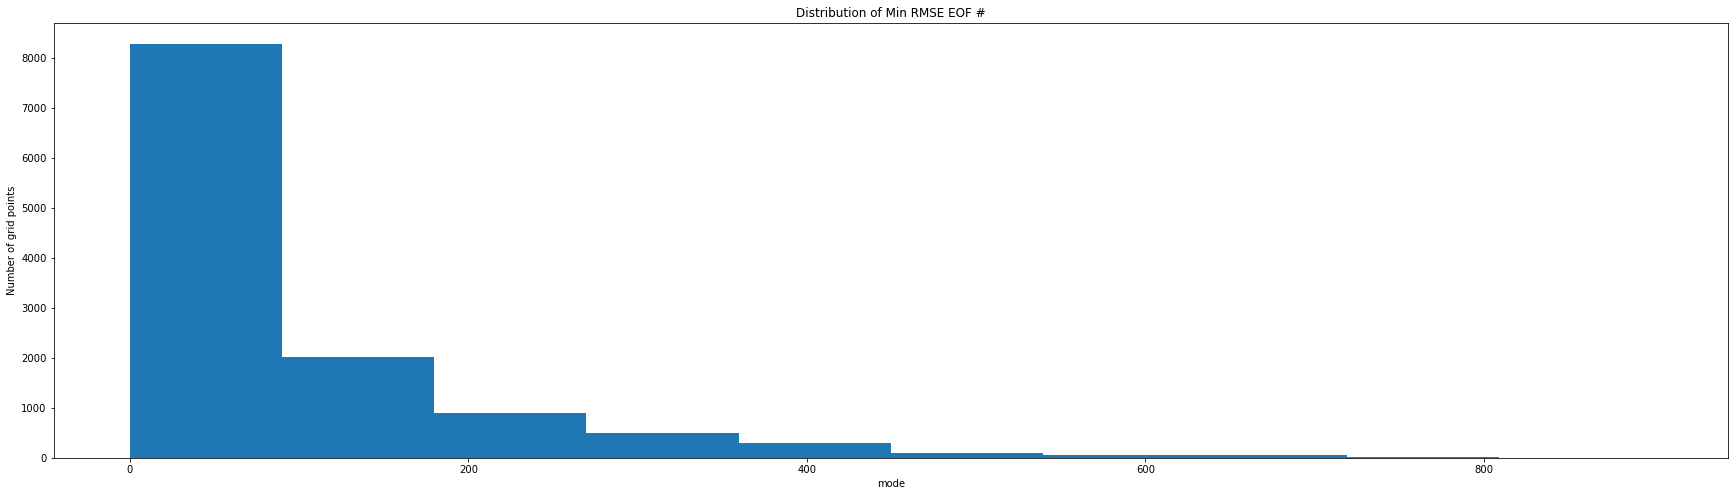

In [14]:
plt.figure(figsize=(30,8))
eof_minrmse.where(eof_minrmse<1000).plot.hist()
plt.ylabel('Number of grid points')
plt.title('Distribution of Min RMSE EOF #')

Text(0.5, 1.0, 'RMSE across AIS for reconstructed dataset with 61 EOFs')

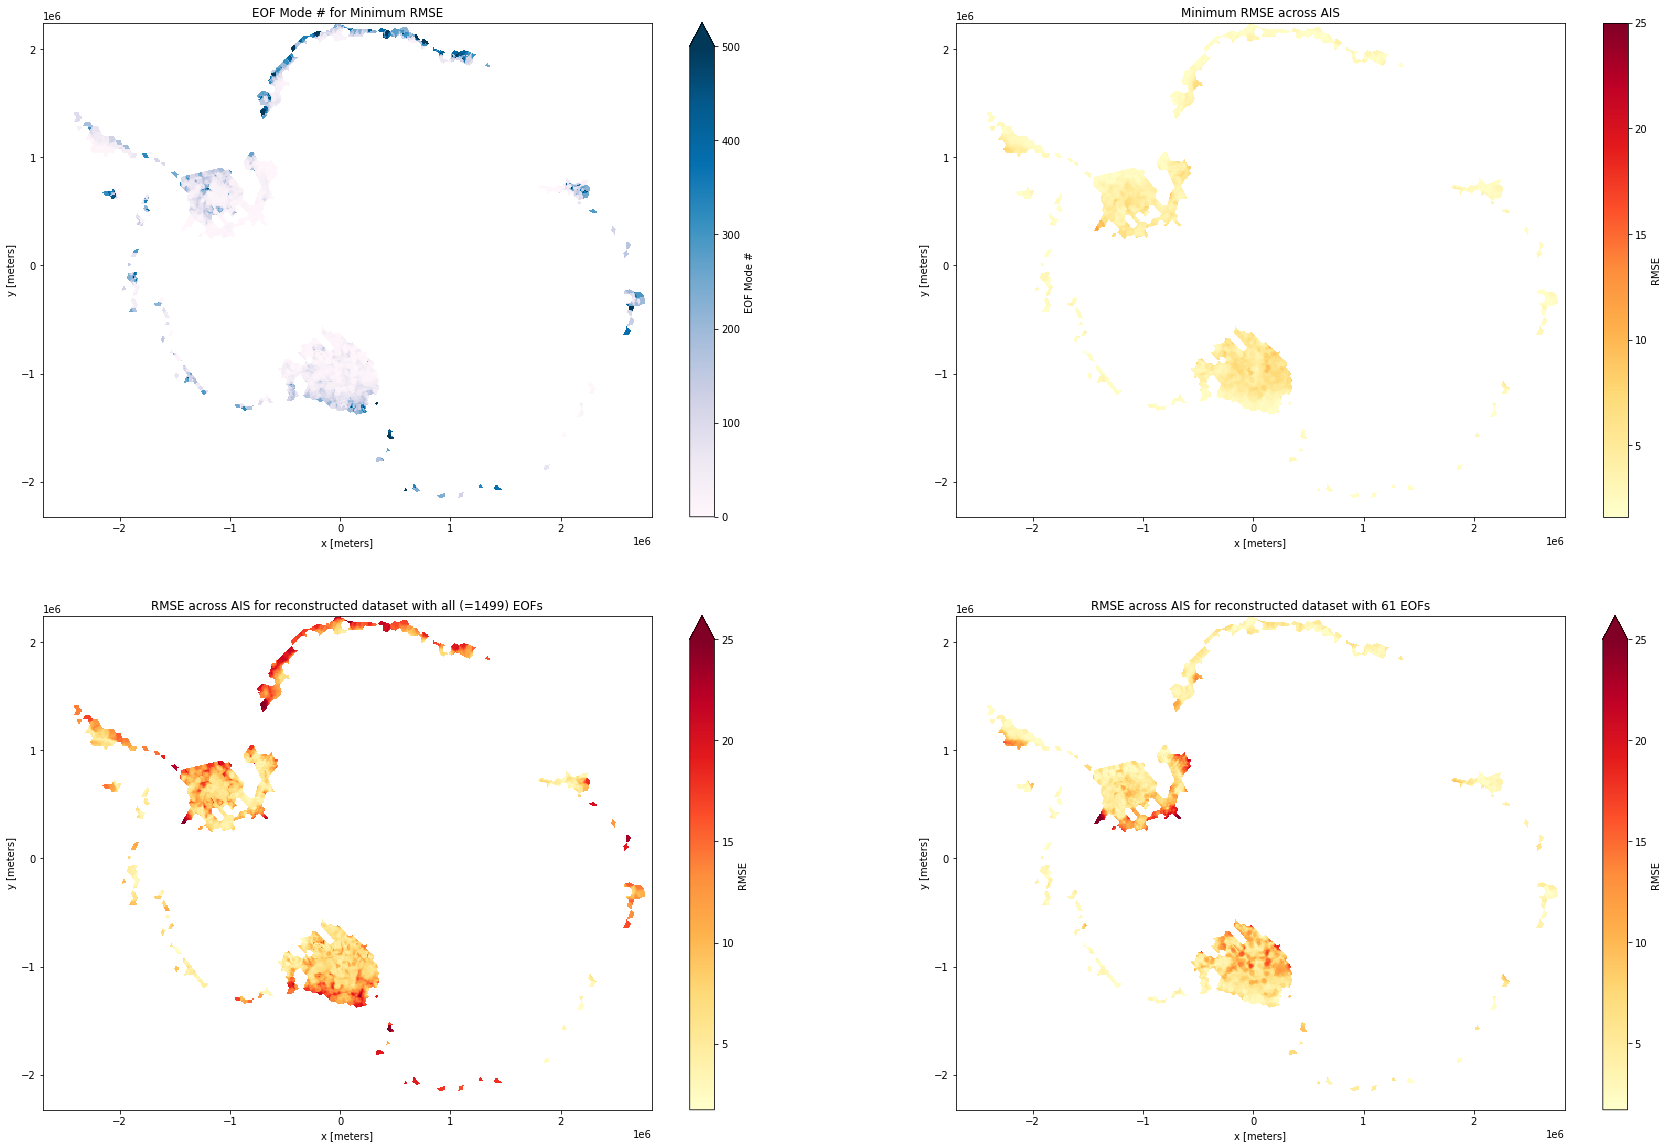

In [19]:
plt.figure(figsize=(30,20))
plt.axes(projection=ccrs.SouthPolarStereo())

plt.subplot(221)
eof_minrmse.plot(cmap="PuBu",
                 cbar_kwargs={"label":"EOF Mode #"},
                 vmax = 500, 
#                 vmin = 0,
                )
plt.title('EOF Mode # for Minimum RMSE')

plt.subplot(222)
minrmse.plot(cmap="YlOrRd",
             cbar_kwargs={"label":"RMSE"},
             vmax = 25, 
#             vmin = 0,
            )
plt.title('Minimum RMSE across AIS')

plt.subplot(223)
rmse_grid[10].plot(cmap="YlOrRd",
                   cbar_kwargs={"label":"RMSE"},
                   vmax = 25, 
#                   vmin = 0,
                  )
plt.title('RMSE across AIS for reconstructed dataset with all (={}) EOFs'.format(rmse_grid_all.mode.values))

plt.subplot(224)
rmse_grid_min.plot(cmap="YlOrRd",
                   cbar_kwargs={"label":"RMSE"},
                   vmax = 25, 
#                   vmin = 0,
                  )
plt.title('RMSE across AIS for reconstructed dataset with {} EOFs'.format(rmse_grid_min.mode.values))

Text(0.5, 1.0, 'Minimum RMSE across AIS')

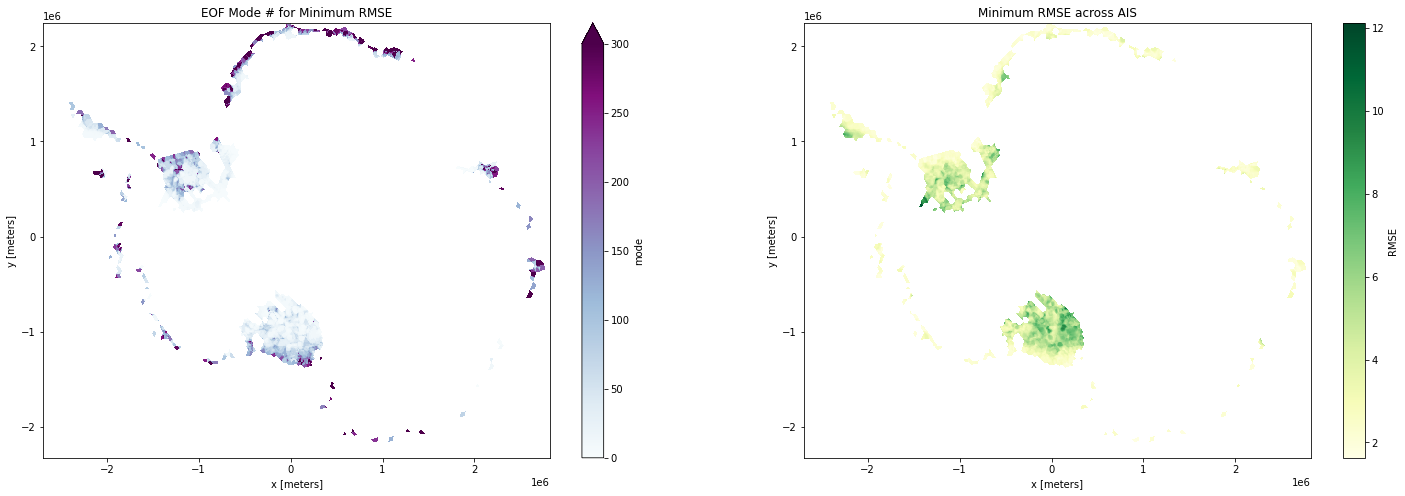

In [130]:
plt.figure(figsize=(25,8))
plt.axes(projection=ccrs.SouthPolarStereo())
#colorbarmax = np.nanmax([data])
#colorbarmin = np.nanmin([data])

plt.subplot(121)
#plt.axes(projection=ccrs.SouthPolarStereo())
eof_minrmse.plot(cmap="BuPu",
                vmax=300,
                vmin=0
                )
plt.title('EOF Mode # for Minimum RMSE')

plt.subplot(122)
#ax2 = plt.axes(projection=ccrs.SouthPolarStereo())
#ax2.coastlines()
#ax2.gridlines()
minrmse.plot(cmap="YlGn", 
             cbar_kwargs={"label": "RMSE"}
            )
plt.title('Minimum RMSE across AIS')


#plt.subplot(133)
#ax3 = plt.axes(projection=ccrs.SouthPolarStereo())
#ax3.coastlines()
#ax3.gridlines()
#allrec.plot(cmap="YlGn")